# **Enhancing Direct Marketing with Machine Learning: Predicting Term Deposit Subscriptions in Portuguese Banking**

# Attribute Information
Attribute Information :

Input variables

**bank client data:**
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means
- education : (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- balance : average yearly balance, in euros (numeric)
- loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**
- contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day: last contact day of the month (numeric 1 -31)
- duration: last contact duration, in seconds (numeric).

**Other attributes:**
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','other', 'unknown', 'success')

**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
data = pd.read_csv("bank-full.csv", sep=';')

In [ ]:
data.shape

(45211, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- **Shape of the dataframe is (45211, 17). There are 45211 rows and 17 columns in the dataset. Out of 17 columns 16 is our independent variables and 1(Target) is our dependent variable.**

In [ ]:
#Renaming the target variable from "y" to "Subscritpion"
data.rename(columns={'y': 'subscription'}, inplace=True)

In [ ]:
data.drop(['contact'], axis=1, inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscription'],
      dtype='object')

**Datatypes of each variable/features:-**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   day           45211 non-null  int64 
 9   month         45211 non-null  object
 10  duration      45211 non-null  int64 
 11  campaign      45211 non-null  int64 
 12  pdays         45211 non-null  int64 
 13  previous      45211 non-null  int64 
 14  poutcome      45211 non-null  object
 15  subscription  45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


### **Categorical and Continuous feature**

In [ ]:
continuous = ["previous","campaign","duration","day","balance","age","pdays"]
categorical = ["poutcome","month","loan","housing","default","education","marital","job"]

print('Continuous: ', ', '.join(continuous))
print('Categorical: ', ', '.join(categorical))

Continuous:  previous, campaign, duration, day, balance, age, pdays
Categorical:  poutcome, month, loan, housing, default, education, marital, job


## Encoding the categorical variable

In [ ]:
#Manual encoding the features that are categorical
encoded_features = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5,
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "subscription":    {"no": 0, "yes": 1}
                    }

data=data.replace(encoded_features)
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,-1,0
1,44,3,1,2,0,29,1,0,5,5,151,1,-1,0,-1,0
2,33,8,2,2,0,2,1,1,5,5,76,1,-1,0,-1,0
3,47,1,2,-1,0,1506,1,0,5,5,92,1,-1,0,-1,0
4,33,-1,1,-1,0,1,0,0,5,5,198,1,-1,0,-1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           45211 non-null  int64
 1   job           45211 non-null  int64
 2   marital       45211 non-null  int64
 3   education     45211 non-null  int64
 4   default       45211 non-null  int64
 5   balance       45211 non-null  int64
 6   housing       45211 non-null  int64
 7   loan          45211 non-null  int64
 8   day           45211 non-null  int64
 9   month         45211 non-null  int64
 10  duration      45211 non-null  int64
 11  campaign      45211 non-null  int64
 12  pdays         45211 non-null  int64
 13  previous      45211 non-null  int64
 14  poutcome      45211 non-null  int64
 15  subscription  45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


### Checking missing values

In [ ]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.618212,2.610178,-1.0,2.0,3.0,5.0,11.0
marital,45211.0,1.832275,0.608230,1.0,1.0,2.0,2.0,3.0
education,45211.0,2.019442,0.902795,-1.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
month,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0


# **Data Visualization**

## **Target Variable**

In [ ]:
data["subscription"].value_counts()

0    39922
1     5289
Name: subscription, dtype: int64

## **Target Vairable plot**
- Here in the data, the target variable is skewed/imbalanced since the number of instances in "no" (Client not subscribed) class outnumbers the "yes"(Client subscribed).
- **We have used SMOTE in further training steps**


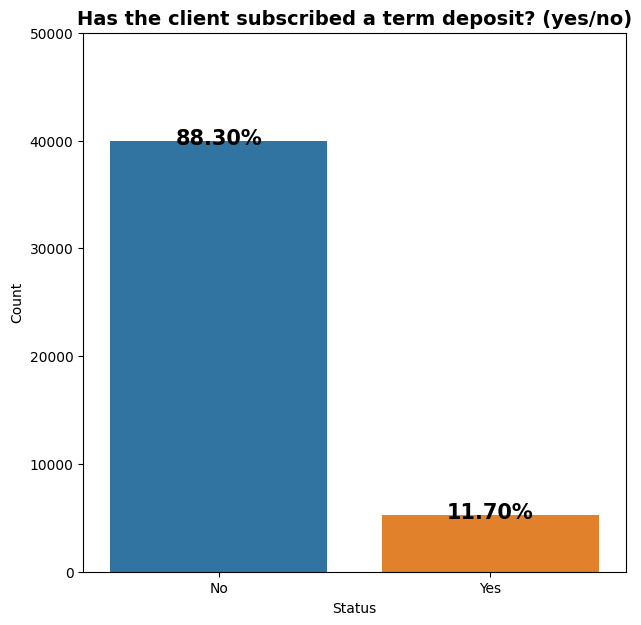

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x='subscription', data=data)
total_count = data['subscription'].shape[0]
for index, value in enumerate(data['subscription'].value_counts()):
    label = f'{value / total_count * 100:.2f}%'
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                fontweight='bold',
                size=15)
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')
ax.set_ylim([0, 50000])
ax.set_title("Has the client subscribed a term deposit? (yes/no)", fontsize=14, fontweight='bold')
plt.show()

## **Boxplot, for checking any outliers present in the data**

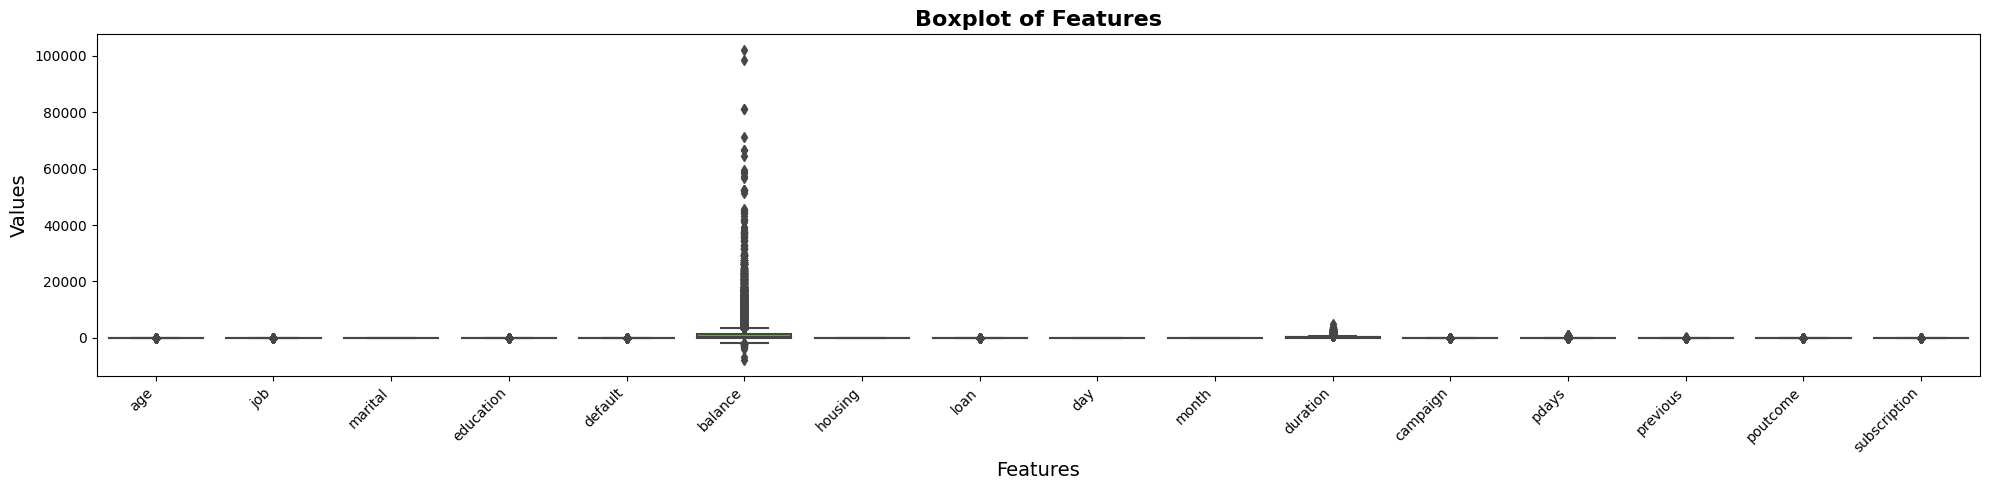

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=data, ax=ax)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.set_title("Boxplot of Features", fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

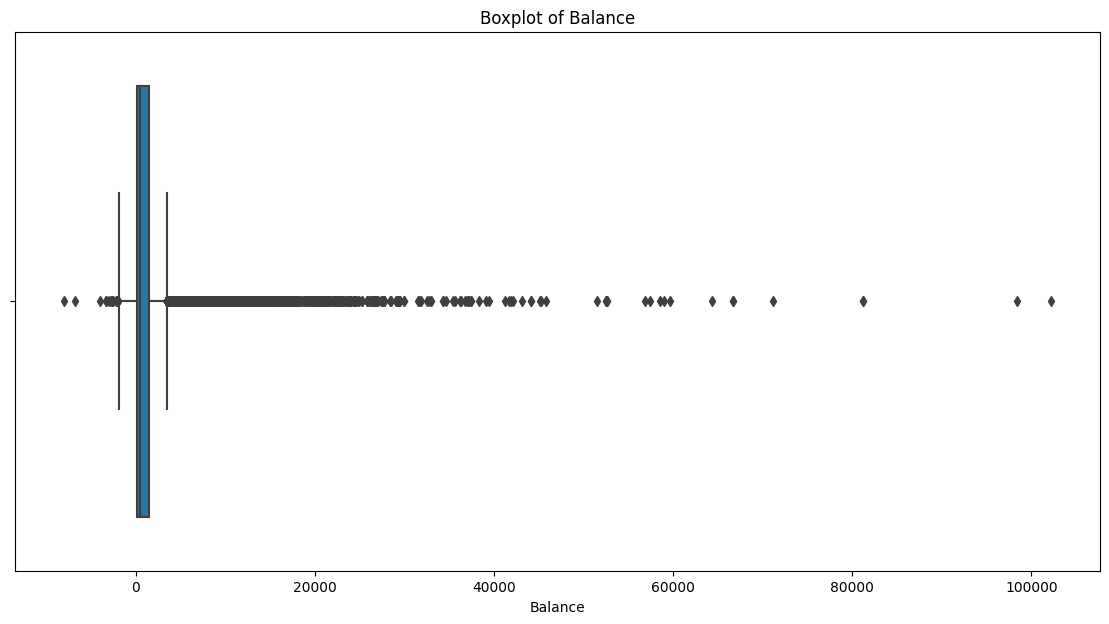

In [ ]:
# Preparing a boxplot for the 'balance' attribute to check for outliers
plt.figure(figsize=(14, 7))
sns.boxplot(x=data['balance'])
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.show()

### Correlation Heatmap

<Axes: title={'center': 'Correlation of Features'}>

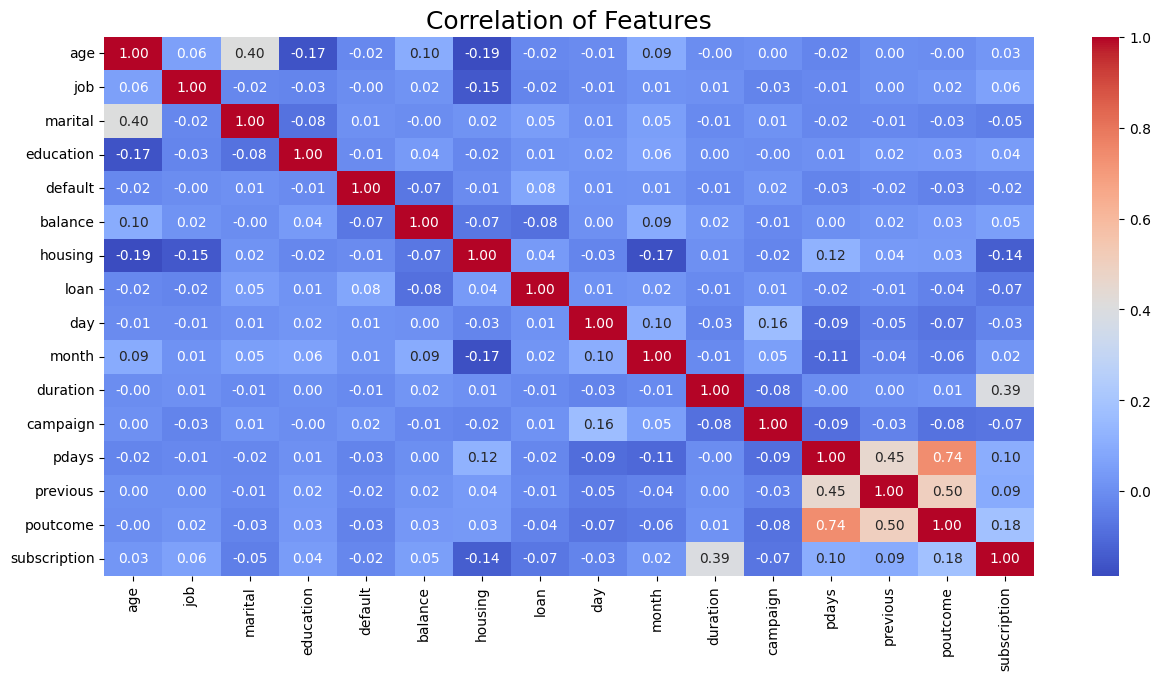

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Features', y=1.00, size=18)
sns.heatmap(data.corr(), cmap='coolwarm',annot=True, fmt='.2f')

- There are variables with both positive and negative correlations to each other.
- The color intensity represents the strength of the correlation, with warmer colors (red) indicating a stronger positive correlation and cooler colors (blue) indicating a stronger negative correlation.
- Some blocks appear darker, which suggests a higher correlation between certain variables, whether positive or negative.
- This plot is useful for identifying potential predictors for modeling and for checking multicollinearity between independent variables.

subscription    1.000000
duration        0.394521
poutcome        0.183468
housing        -0.139173
pdays           0.103621
previous        0.093236
campaign       -0.073172
loan           -0.068185
job             0.060227
balance         0.052838
Name: subscription, dtype: float64


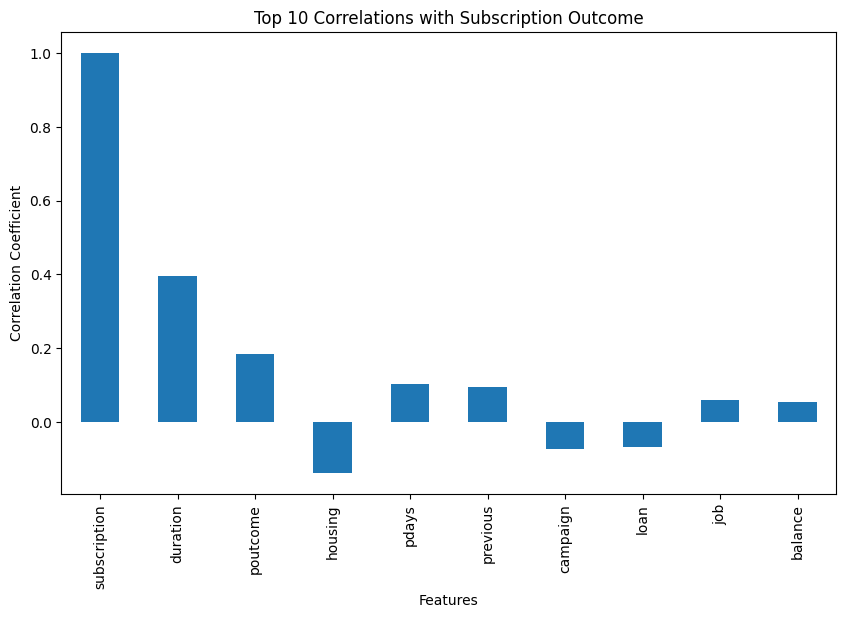

In [ ]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['subscription'].sort_values(key=abs, ascending=False)

# Display the sorted correlations with the target variable
print(target_correlation.head(10))

# For a clearer visualization, we'll plot the top 10 correlations.
plt.figure(figsize=(10, 6))
target_correlation.head(10).plot(kind='bar')
plt.title('Top 10 Correlations with Subscription Outcome')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

This bar chart highlights the features that have the strongest relationships with the likelihood of a client subscribing to a term deposit.

## **Job Distribution among clients**

job: "unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10, "student": 11

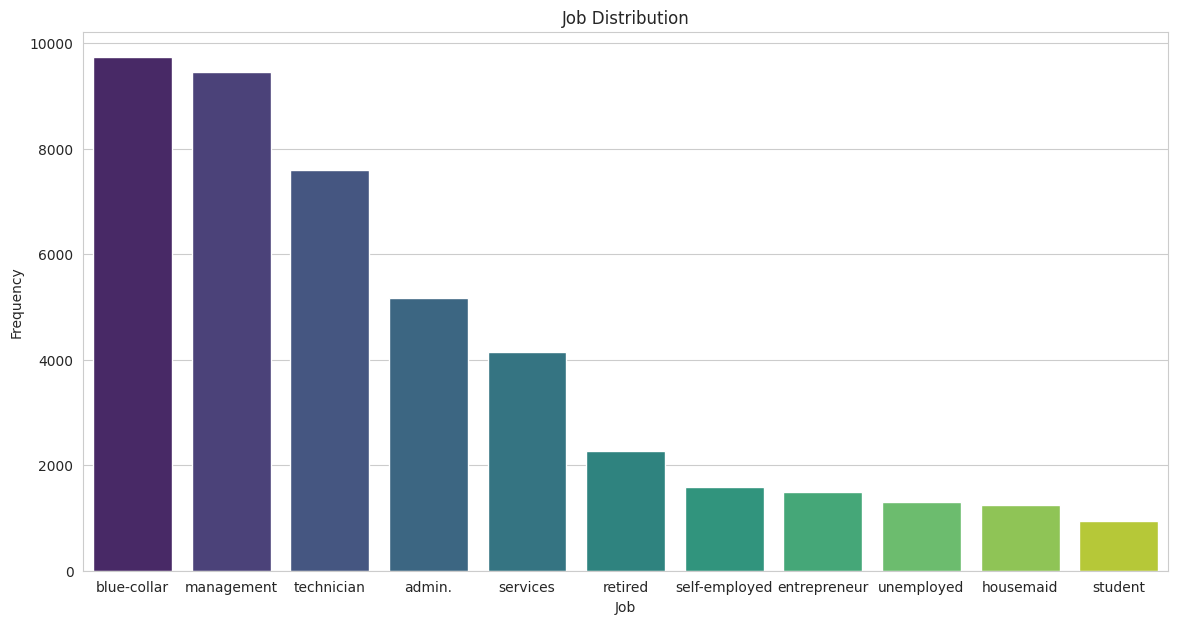

In [ ]:
job_labels = {1: "blue-collar", 2: "management", 3: "technician", 4: "admin.", 5: "services",
              6: "retired", 7: "self-employed", 8: "entrepreneur", 9: "unemployed", 10: "housemaid",
              11: "student"}
sns.set_style('whitegrid')
plt.figure(figsize=(14, 7))
job_counts = data['job'].map(job_labels).value_counts()  # Map numeric codes to labels
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()


The visualization above displays the job distribution among clients in the dataset, with the 'blue-collar' job type being the most common, followed by 'management' and 'technician'. This gives us insight into the professional background of the individuals targeted in the bank's marketing campaign.

## **Cross-Analysis of Job Types and Education Levels**

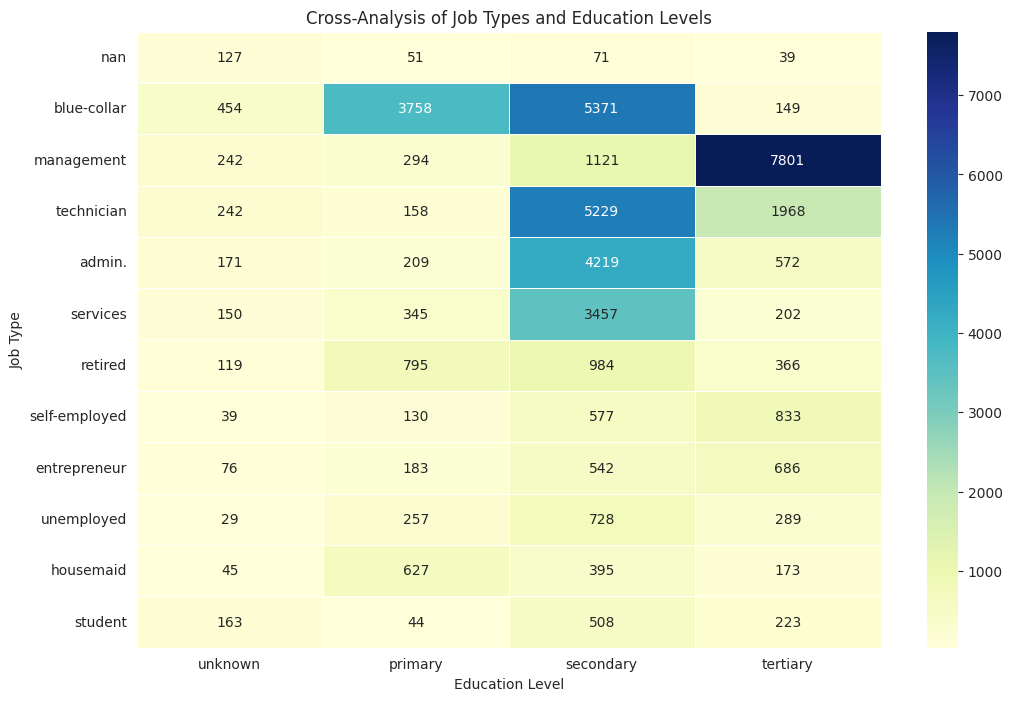

In [ ]:
education_labels = {-1: "unknown", 1: "primary", 2: "secondary", 3: "tertiary"}

job_edu_crosstab = pd.crosstab(data['job'], data['education'])

job_edu_crosstab.index = job_edu_crosstab.index.map(job_labels)
job_edu_crosstab.columns = job_edu_crosstab.columns.map(education_labels)

plt.figure(figsize=(12, 8))
sns.heatmap(job_edu_crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Cross-Analysis of Job Types and Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Job Type')
plt.show()


The heatmap visualizes the cross-analysis of job types and education levels. It shows the frequency of each combination within the dataset, with darker shades representing higher frequencies. Patterns such as the prevalence of secondary education among blue-collar workers and tertiary education among managers are evident.

## **Marital status and Financial Behavior**
- Visualizing the relationship betwee martial status and fincancial indicators such as balance levels and loan defaults.

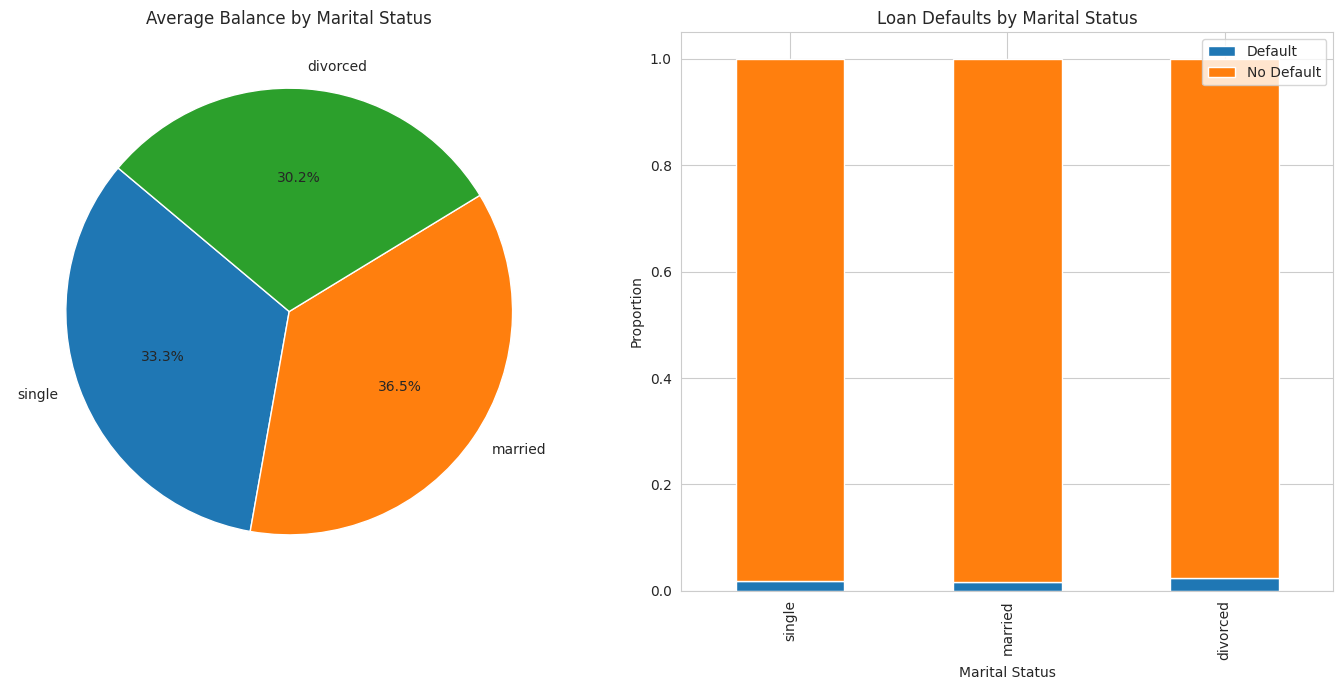

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define marital status labels
marital_labels = {1: "single", 2: "married", 3: "divorced"}

# Group data by marital status
marital_status_group = data.groupby('marital').agg({'balance': 'mean', 'default': 'mean'})

# Replace numeric marital status codes with labels
marital_status_group.index = marital_status_group.index.map(marital_labels)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for average balance by marital status
axes[0].pie(marital_status_group['balance'], labels=marital_status_group.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Average Balance by Marital Status')

# Stacked bar chart for loan defaults by marital status
marital_status_group['non_default'] = 1 - marital_status_group['default']
marital_status_group[['default', 'non_default']].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Loan Defaults by Marital Status')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Marital Status')
axes[1].legend(['Default', 'No Default'])

plt.tight_layout()
plt.show()


- **Average Balance by Marital Status:** The pie chart indicates the distribution of average balances among different marital statuses. It suggests which marital group tends to have a higher or lower average balance in their bank accounts.
- **Loan Defaults by Marital Status:** The stacked bar chart shows the proportion of loan defaults compared to non-defaults within each marital status category.

- This provides an understanding of which marital status has a higher tendency to default on loans.

These visualizations can help in identifying patterns and trends related to financial behavior across different marital statuses, which could be valuable for targeted marketing strategies or risk assessment in banking services.

## **Subscription Rate by Personal Loan Status**

<Figure size 1000x600 with 0 Axes>

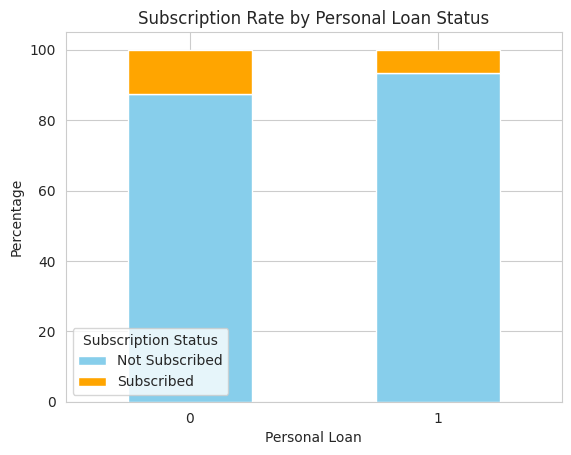

subscription          0          1
loan                              
0             87.344273  12.655727
1             93.318609   6.681391


In [ ]:
loan_subscription_df = data.groupby('loan')['subscription'].value_counts(normalize=True).unstack() * 100

# Plotting the relationship
plt.figure(figsize=(10, 6))
loan_subscription_df.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Subscription Rate by Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Subscription Status', labels=['Not Subscribed', 'Subscribed'])
plt.show()

# Output the percentages
print(loan_subscription_df)

- Customers without a personal loan have a higher subscription rate to term deposits (approximately 12.66%) compared to those with a personal loan (approximately 6.68%).
- A significant majority of customers, regardless of their personal loan status, have not subscribed to a term deposit, with non-loan customers at about 87.34% and loan customers at 93.32% not subscribing.

This analysis suggests that having a personal loan may negatively impact the likelihood of subscribing to a term deposit.

## **Identifying different segments of customers based on their job, marital status, education, and balance, and doing analyzes for the success rate of the marketing campaign within each segment.**

     job  marital  education  average_balance  success_rate
116    9        3         -1      1088.000000      1.000000
137   11        2          1      1774.500000      0.500000
133   11        1          1      1180.756098      0.365854
143   11        3          3      1015.333333      0.333333
104    8        3         -1      1855.333333      0.333333


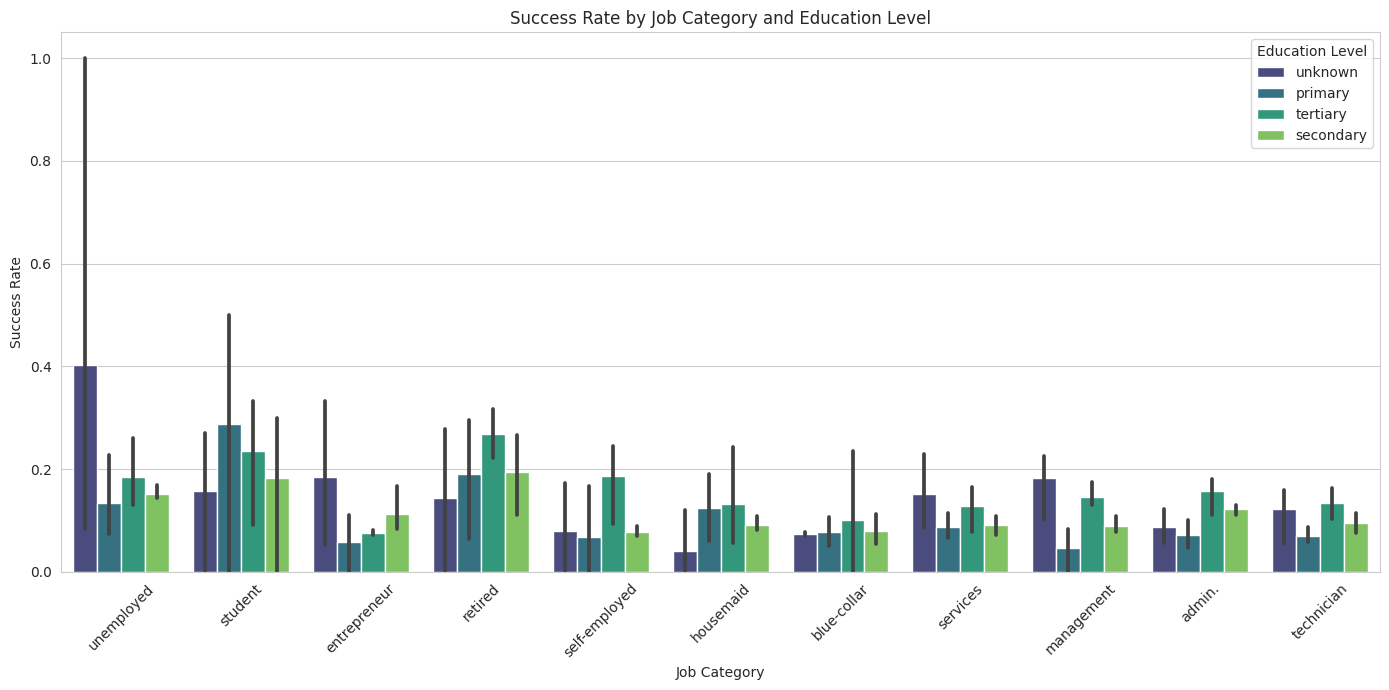

In [ ]:
segment_df = data[['job', 'marital', 'education', 'balance', 'subscription']].copy()
segment_grouped = segment_df.groupby(['job', 'marital', 'education']).agg({'balance': 'mean', 'subscription': 'mean'}).reset_index()
segment_grouped.rename(columns={'balance': 'average_balance', 'subscription': 'success_rate'}, inplace=True)
segment_grouped.sort_values(by='success_rate', ascending=False, inplace=True)
print(segment_grouped.head())
segment_grouped['job'] = segment_grouped['job'].map(job_labels)
segment_grouped['education'] = segment_grouped['education'].map(education_labels)
plt.figure(figsize=(14, 7))
sns.barplot(data=segment_grouped, x='job', y='success_rate', hue='education', palette='viridis')
plt.title('Success Rate by Job Category and Education Level')
plt.xlabel('Job Category')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()

The customer segments based on their job, marital status, education, and balance have been identified, and the success rate of the marketing campaign within each segment has been calculated. Here are the top segments with the highest success rates:
- Unemployed and divorced individuals with an unknown education level have a success rate of 100%.
- Married students with primary education have a success rate of 50%.
- Single students with primary education have a success rate of approximately 36.6%.
- Divorced entrepreneurs with an unknown education level have a success rate of approximately 33.3%.
- Divorced students with tertiary education also have a success rate of approximately 33.3%.

The average balance for each segment is also provided, which may indicate the financial stability of the customers within each segment.

## Campaign Distribution

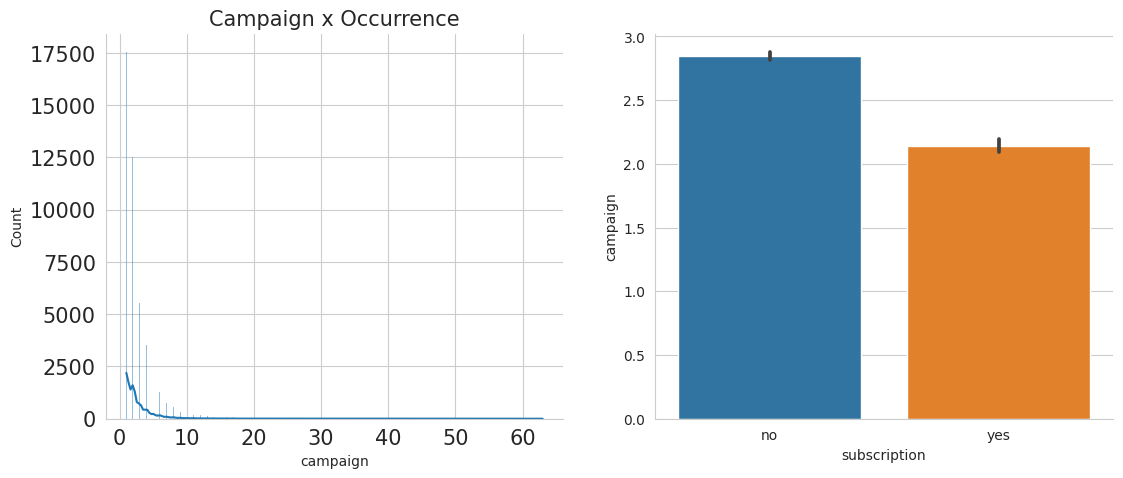

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# Use histplot instead of distplot
sns.histplot(data['campaign'], ax=ax1, kde=True)
sns.despine(ax=ax1)
ax1.set_title('Campaign x Occurrence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="subscription", y="campaign", data=data, ax=ax2)
sns.despine(ax=ax2)
ax2.set_xticklabels(encoded_features['subscription'])

plt.show()


## **Balance and Loan Relationship**
- **Investigating the relationship between customers' balance levels and their propensity to take a loan.**

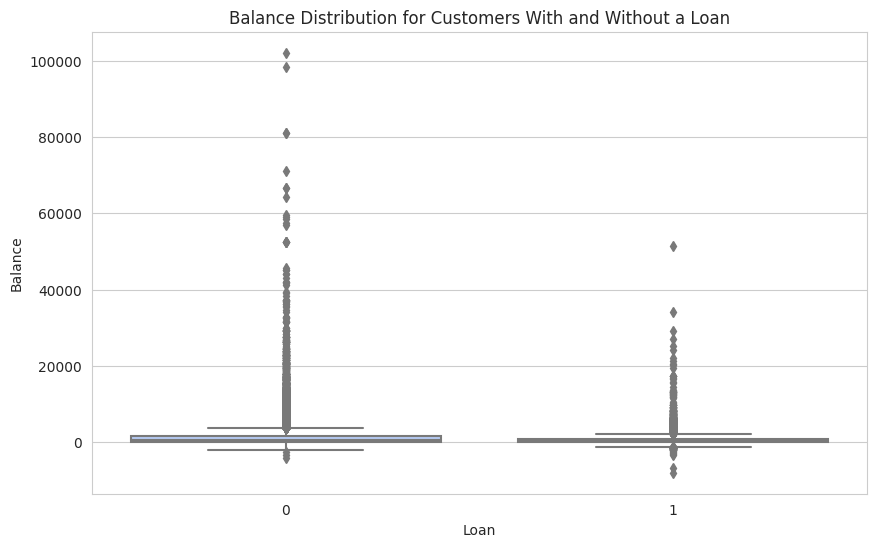

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a boxplot to visualize the distribution of balances for customers with and without a loan
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='loan', y='balance', data=data, palette='coolwarm')
ax.set_title('Balance Distribution for Customers With and Without a Loan')
ax.set_xlabel('Loan')
ax.set_ylabel('Balance')
plt.show()

From the boxplot, we can observe the central tendency and spread of the balance amounts for both groups. It appears that customers without a loan tend to have higher balances, which is indicated by the higher median and the larger spread of the balance distribution.

## **Default Status Impact:**
- Assessing the influence of having a credit default on the likelihood of subscribing to a term deposit.

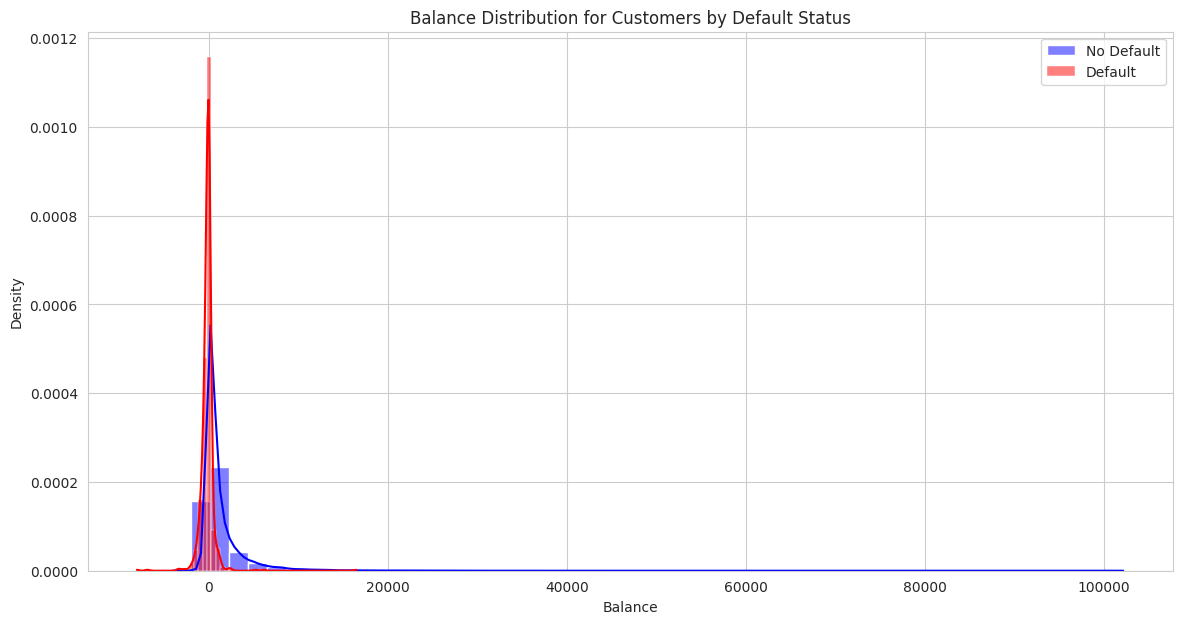

In [ ]:
plt.figure(figsize=(14, 7))

# Customers with no default
no_default = data[data['default'] == 0]['balance']
# Customers with default
yes_default = data[data['default'] == 1]['balance']

# Plotting the histograms
sns.histplot(no_default, color='blue', label='No Default', kde=True, stat='density', bins=50)
sns.histplot(yes_default, color='red', label='Default', kde=True, stat='density', bins=50)

plt.title('Balance Distribution for Customers by Default Status')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

## **Housing and Personal Loan Analysis**
- Exploring the correlation between  having a housing loan and a personal loan.
- Determining if having loans affects the decision to subscribe to a term deposit
- We have calculated the subscription rate for each combination of housing and personal loans

loan         0     1
housing             
0        17204  2877
1        20763  4367
subscription         0         1
housing loan                    
0       0     0.817775  0.182225
        1     0.923879  0.076121
1       0     0.919568  0.080432
        1     0.939318  0.060682


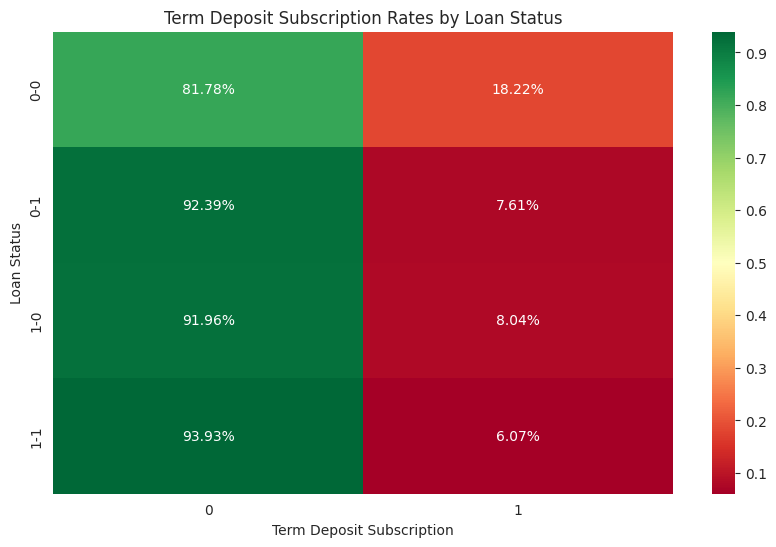

In [ ]:
loan_crosstab = pd.crosstab(data['housing'], data['loan'])
print(loan_crosstab)


subscription_rates = data.groupby(['housing', 'loan'])['subscription'].value_counts(normalize=True).unstack()
print(subscription_rates)

# Visualizing the correlation between housing loan, personal loan, and term deposit subscription
plt.figure(figsize=(10, 6))
sns.heatmap(subscription_rates, annot=True, fmt='.2%', cmap='RdYlGn')
plt.title('Term Deposit Subscription Rates by Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Term Deposit Subscription')
plt.show()

The heatmap provides a visual representation of the subscription rates, with the color intensity indicating the percentage of customers who subscribed to a term deposit. **It appears that customers without any loans have a higher rate of subscribing to term deposits compared to those with loans.**

# Model Training

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,-1,0
1,44,3,1,2,0,29,1,0,5,5,151,1,-1,0,-1,0
2,33,8,2,2,0,2,1,1,5,5,76,1,-1,0,-1,0
3,47,1,2,-1,0,1506,1,0,5,5,92,1,-1,0,-1,0
4,33,-1,1,-1,0,1,0,0,5,5,198,1,-1,0,-1,0


Here, we converted the "unknown" term to other in poutcome feature, as having unknwon dont give any significant information, so here we replaced -1 with 2.

In [ ]:
data.loc[data['poutcome'] == -1, 'poutcome'] = 2
data['poutcome'].value_counts()
# 2 = other, 0 = failure, 1 = success

2    38799
0     4901
1     1511
Name: poutcome, dtype: int64

In [ ]:
X = data.drop('subscription', axis=1)
y = data[['subscription']]
data.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,2,0


# Splitting the data into training, testing, validation
- Applied SMOTE for class imbalance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
print("Original Data:")
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"Class distribution in original data:\n{y.value_counts()}")

# Split the data into training (70%) and temporary data (30%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary data into validation (50%) and testing (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nAfter Train-Test-Validation Split:")
print(f"X_train shape: {X_train_temp.shape}, y_train shape: {y_train_temp.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Class distribution in y_train:\n{y_train_temp.value_counts()}")
print(f"Class distribution in y_val:\n{y_val.value_counts()}")
print(f"Class distribution in y_test:\n{y_test.value_counts()}")

# Standard scaling for each set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_temp)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_temp)

print("\nAfter SMOTE:")
print(f"X_train_smote shape: {X_train_smote.shape}, y_train_smote shape: {y_train_smote.shape}")
print(f"Class distribution in y_train_smote:\n{y_train_smote.value_counts()}")


Original Data:
X shape: (45211, 15), y shape: (45211, 1)
Class distribution in original data:
subscription
0               39922
1                5289
dtype: int64

After Train-Test-Validation Split:
X_train shape: (31647, 15), y_train shape: (31647, 1)
X_val shape: (6782, 15), y_val shape: (6782, 1)
X_test shape: (6782, 15), y_test shape: (6782, 1)
Class distribution in y_train:
subscription
0               27956
1                3691
dtype: int64
Class distribution in y_val:
subscription
0               5961
1                821
dtype: int64
Class distribution in y_test:
subscription
0               6005
1                777
dtype: int64

After SMOTE:
X_train_smote shape: (55912, 15), y_train_smote shape: (55912, 1)
Class distribution in y_train_smote:
subscription
0               27956
1               27956
dtype: int64


# Logistic Regression

## Training and Validation

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report on Training Set:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     27956
           1       0.80      0.79      0.80     27956

    accuracy                           0.80     55912
   macro avg       0.80      0.80      0.80     55912
weighted avg       0.80      0.80      0.80     55912

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      5961
           1       0.36      0.77      0.49       821

    accuracy                           0.81      6782
   macro avg       0.66      0.79      0.69      6782
weighted avg       0.89      0.81      0.83      6782



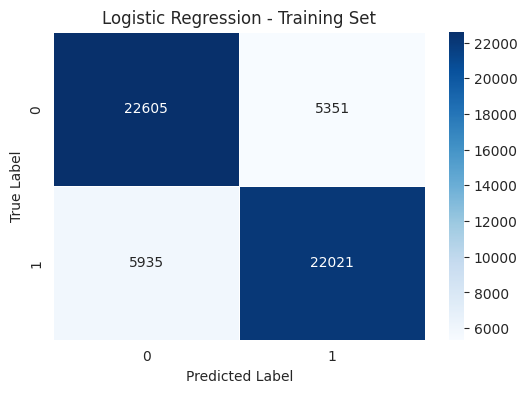

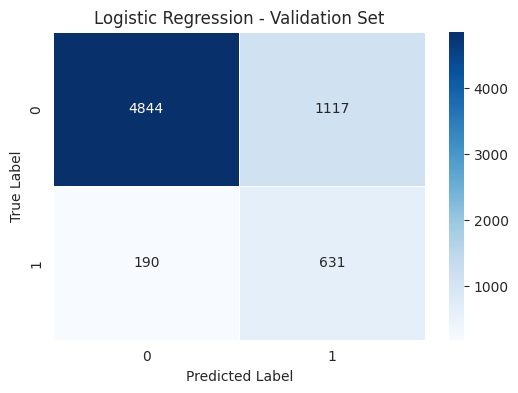

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

logreg_model = LogisticRegression(random_state=42)


logreg_model.fit(X_train_smote, y_train_smote)

y_train_pred = logreg_model.predict(X_train_smote)

y_val_pred = logreg_model.predict(X_val_scaled)

accuracy_train = accuracy_score(y_train_smote, y_train_pred)
classification_report_train = classification_report(y_train_smote, y_train_pred)
print("Classification Report on Training Set:\n", classification_report_train)

accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)
print("Classification Report on Validation Set:\n", classification_report_val)

cm_train = confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Logistic Regression - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Logistic Regression - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Testing


Classification Report for Logistic Regression on Testing Set:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      6005
           1       0.34      0.78      0.47       777

    accuracy                           0.80      6782
   macro avg       0.65      0.79      0.67      6782
weighted avg       0.89      0.80      0.83      6782



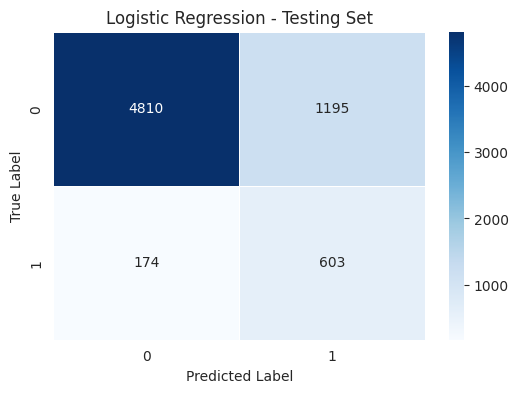

Accuracy on Testing Set for Logistic Regression: 0.7981


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_and_plot(model, X, y, title):

    y_test_pred = model.predict(X)

    accuracy_test = accuracy_score(y, y_test_pred)
    classification_report_test = classification_report(y, y_test_pred)
    print(f"\nClassification Report for {title} on Testing Set:\n", classification_report_test)

    cm_test = confusion_matrix(y, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    plt.title(f'{title} - Testing Set')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(f"Accuracy on Testing Set for {title}: {accuracy_test:.4f}")

evaluate_and_plot(logreg_model, X_test_scaled, y_test, 'Logistic Regression')


# SVM

## Training and Validation

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report on Training Set (SVM):
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     27956
           1       0.85      0.91      0.88     27956

    accuracy                           0.87     55912
   macro avg       0.88      0.87      0.87     55912
weighted avg       0.88      0.87      0.87     55912

Classification Report on Validation Set (SVM):
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      5961
           1       0.39      0.79      0.53       821

    accuracy                           0.83      6782
   macro avg       0.68      0.81      0.71      6782
weighted avg       0.90      0.83      0.85      6782



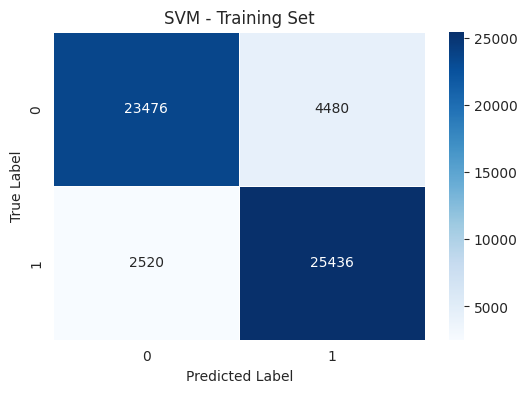

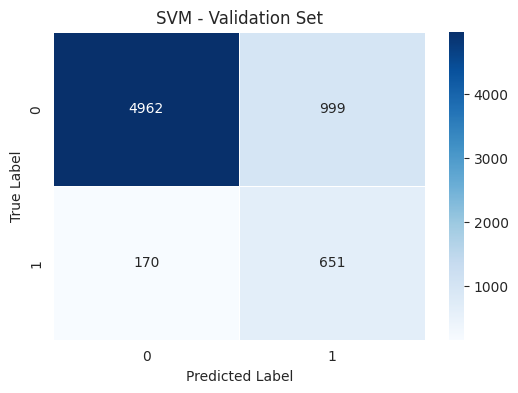

In [ ]:
svm_model = SVC(random_state=42)

svm_model.fit(X_train_smote, y_train_smote)

y_train_pred_svm = svm_model.predict(X_train_smote)

y_val_pred_svm = svm_model.predict(X_val_scaled)

accuracy_train_svm = accuracy_score(y_train_smote, y_train_pred_svm)
classification_report_train_svm = classification_report(y_train_smote, y_train_pred_svm)
print("Classification Report on Training Set (SVM):\n", classification_report_train_svm)

accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
classification_report_val_svm = classification_report(y_val, y_val_pred_svm)
print("Classification Report on Validation Set (SVM):\n", classification_report_val_svm)

cm_train_svm = confusion_matrix(y_train_smote, y_train_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('SVM - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_val_svm = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_svm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('SVM - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Testing

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report for SVM on Testing Set:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      6005
           1       0.37      0.80      0.50       777

    accuracy                           0.82      6782
   macro avg       0.67      0.81      0.70      6782
weighted avg       0.90      0.82      0.85      6782



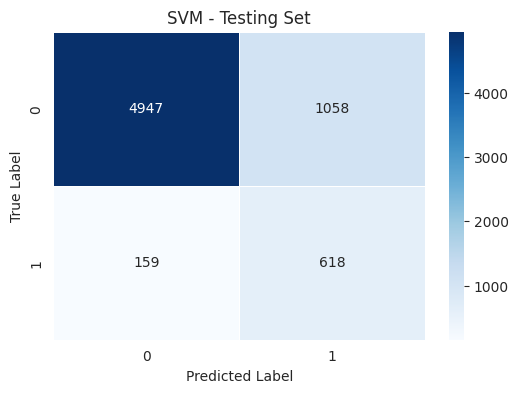

Accuracy on Testing Set for SVM: 0.8206


In [ ]:
evaluate_and_plot(svm_model, X_test_scaled, y_test, 'SVM')

# Decision Tree Classifier

Classification Report on Training Set (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27956
           1       1.00      1.00      1.00     27956

    accuracy                           1.00     55912
   macro avg       1.00      1.00      1.00     55912
weighted avg       1.00      1.00      1.00     55912

Classification Report on Validation Set (Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      5961
           1       0.45      0.53      0.48       821

    accuracy                           0.86      6782
   macro avg       0.69      0.72      0.70      6782
weighted avg       0.87      0.86      0.87      6782



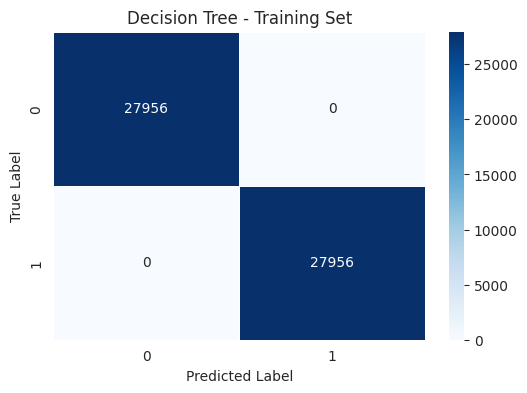

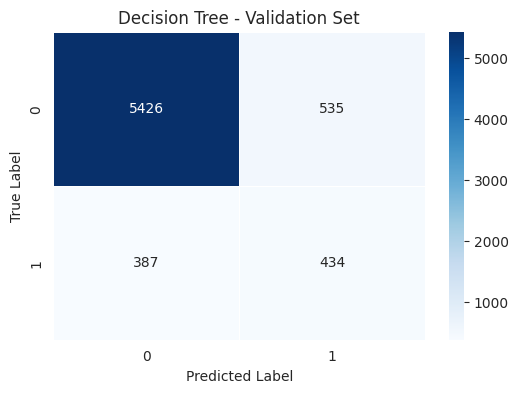

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dtree_model = DecisionTreeClassifier(random_state=42)

dtree_model.fit(X_train_smote, y_train_smote)
y_train_pred_dtree = dtree_model.predict(X_train_smote)
y_val_pred_dtree = dtree_model.predict(X_val_scaled)

accuracy_train_dtree = accuracy_score(y_train_smote, y_train_pred_dtree)
classification_report_train_dtree = classification_report(y_train_smote, y_train_pred_dtree)
print("Classification Report on Training Set (Decision Tree):\n", classification_report_train_dtree)

accuracy_val_dtree = accuracy_score(y_val, y_val_pred_dtree)
classification_report_val_dtree = classification_report(y_val, y_val_pred_dtree)
print("Classification Report on Validation Set (Decision Tree):\n", classification_report_val_dtree)

cm_train_dtree = confusion_matrix(y_train_smote, y_train_pred_dtree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_dtree, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Decision Tree - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_val_dtree = confusion_matrix(y_val, y_val_pred_dtree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_dtree, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Decision Tree - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**The preceding code exhibited overfitting tendencies in the model. Therefore, we aim to address this issue by implementing a regularized decision tree model in the subsequent steps.**

##  Regularized Decision Tree model
- Regularization techniques, such as limiting the maximum depth of the tree and adjusting the minimum samples required for splitting and leaf nodes, are applied to enhance the model's generalization capability.
- This approach seeks to strike a balance between capturing patterns in the training data and preventing the model from fitting noise.
- The performance of the regularized decision tree model is evaluated on both the training and validation sets, providing insights into its ability to generalize well to new, unseen data.

Accuracy on Training Set (Regularized Decision Tree): 0.8444877664901989
Accuracy on Validation Set (Regularized Decision Tree): 0.825567679150693

Classification Report for Decision Tree (Pruned) on Testing Set:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      6005
           1       0.38      0.81      0.51       777

    accuracy                           0.82      6782
   macro avg       0.67      0.82      0.70      6782
weighted avg       0.90      0.82      0.85      6782



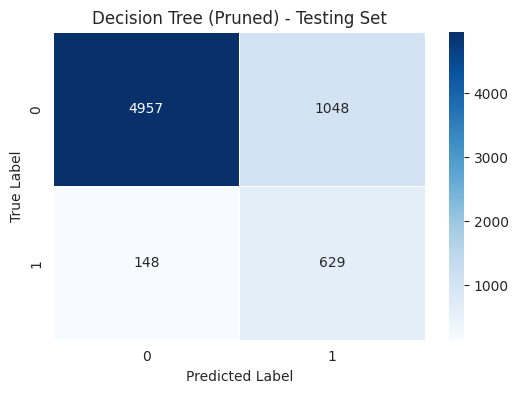

Accuracy on Testing Set for Decision Tree (Pruned): 0.8237


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtree_model_regularized = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dtree_model_regularized.fit(X_train_smote, y_train_smote)
y_train_pred_dtree_regularized = dtree_model_regularized.predict(X_train_smote)
y_val_pred_dtree_regularized = dtree_model_regularized.predict(X_val_scaled)
accuracy_train_dtree_regularized = accuracy_score(y_train_smote, y_train_pred_dtree_regularized)
print("Accuracy on Training Set (Regularized Decision Tree):", accuracy_train_dtree_regularized)
accuracy_val_dtree_regularized = accuracy_score(y_val, y_val_pred_dtree_regularized)
print("Accuracy on Validation Set (Regularized Decision Tree):", accuracy_val_dtree_regularized)
evaluate_and_plot(dtree_model_regularized, X_test_scaled, y_test, 'Decision Tree (Pruned)')

## Decision Tree model with Bagging Classifier
- This is done to improve the model's generalization performance, particularly in the context of imbalanced datasets (handled by SMOTE) and potential overfitting (addressed by pruning).
- Adjusting parameters like ccp_alpha allows us to fine-tune the model for better results.

In [ ]:
base_dtree_model = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
bagging_model = BaggingClassifier(
    base_dtree_model,
    n_estimators=50,
    random_state=42
)
bagging_model.fit(X_train_smote, y_train_smote)
y_train_pred_bagging = bagging_model.predict(X_train_smote)
y_val_pred_bagging = bagging_model.predict(X_val_scaled)
accuracy_train_bagging = accuracy_score(y_train_smote, y_train_pred_bagging)
print(f"Accuracy on Training Set (Bagging with Pruned Decision Tree): {accuracy_train_bagging:.4f}")
accuracy_val_bagging = accuracy_score(y_val, y_val_pred_bagging)
print(f"Accuracy on Validation Set (Bagging with Pruned Decision Tree): {accuracy_val_bagging:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on Training Set (Bagging with Pruned Decision Tree): 0.7999
Accuracy on Validation Set (Bagging with Pruned Decision Tree): 0.7900



Classification Report for Decision Tree with Bagging on Testing Set:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      6005
           1       0.32      0.77      0.45       777

    accuracy                           0.78      6782
   macro avg       0.64      0.78      0.66      6782
weighted avg       0.89      0.78      0.82      6782



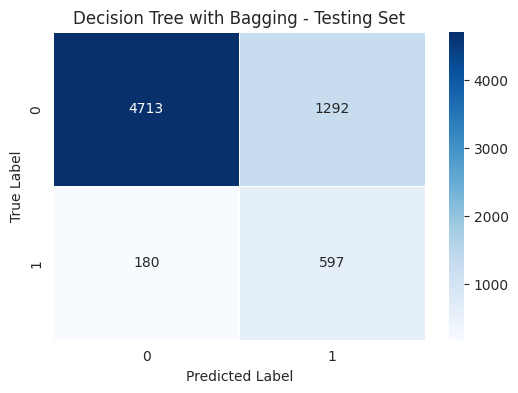

Accuracy on Testing Set for Decision Tree with Bagging: 0.7830


In [ ]:
evaluate_and_plot(bagging_model, X_test_scaled, y_test, 'Decision Tree with Bagging')

# XGBoost Classifier with Regularization for Training and Validation
- Regularization in XGBoost is employed to prevent overfitting, a common issue in complex models trained on limited data. It helps by penalizing large coefficients (L1 and L2 regularization) to control model complexity, improve generalization to unseen data, and handle class imbalance.
- Experimenting with regularization parameters allows finding the right balance between fitting the training data and ensuring the model's ability to generalize effectively.

## Training and Validation

Classification Report on Training Set:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     27956
           1       0.90      0.93      0.92     27956

    accuracy                           0.91     55912
   macro avg       0.92      0.91      0.91     55912
weighted avg       0.92      0.91      0.91     55912

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      5961
           1       0.49      0.71      0.58       821

    accuracy                           0.88      6782
   macro avg       0.72      0.80      0.75      6782
weighted avg       0.90      0.88      0.89      6782



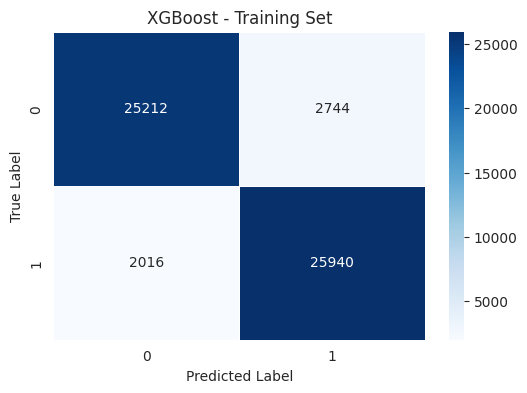

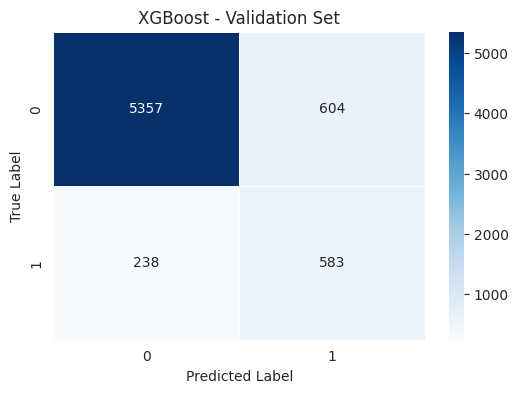

In [ ]:

xgb_model = xgb.XGBClassifier(
    random_state=42,
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3

)
xgb_model.fit(X_train_smote, y_train_smote)
y_train_pred = xgb_model.predict(X_train_smote)
y_val_pred = xgb_model.predict(X_val_scaled)
accuracy_train = accuracy_score(y_train_smote, y_train_pred)
classification_report_train = classification_report(y_train_smote, y_train_pred)
print("Classification Report on Training Set:\n", classification_report_train)

accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)
print("Classification Report on Validation Set:\n", classification_report_val)

cm_train = confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('XGBoost - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('XGBoost - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Testing


Classification Report for XGBoost Classifier with Regularization on Testing Set:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      6005
           1       0.48      0.73      0.58       777

    accuracy                           0.88      6782
   macro avg       0.72      0.82      0.75      6782
weighted avg       0.91      0.88      0.89      6782



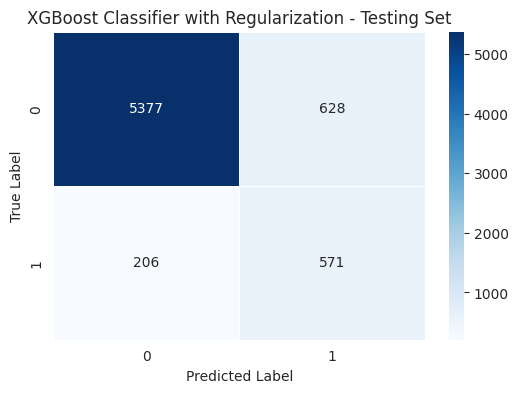

Accuracy on Testing Set for XGBoost Classifier with Regularization: 0.8770


In [ ]:
evaluate_and_plot(xgb_model, X_test_scaled, y_test, 'XGBoost Classifier with Regularization')

# Gradient Boosting

## Training and Validation

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report on Training Set:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     27956
           1       0.91      0.93      0.92     27956

    accuracy                           0.92     55912
   macro avg       0.92      0.92      0.92     55912
weighted avg       0.92      0.92      0.92     55912

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      5961
           1       0.50      0.71      0.59       821

    accuracy                           0.88      6782
   macro avg       0.73      0.81      0.76      6782
weighted avg       0.90      0.88      0.89      6782



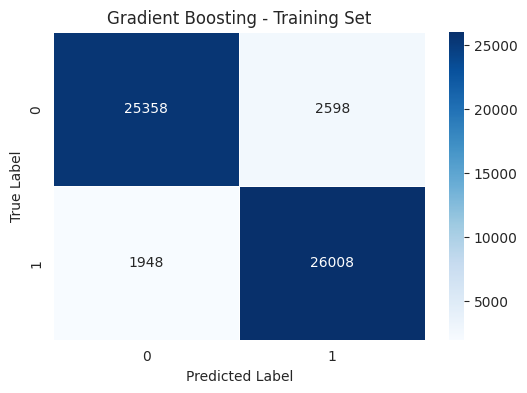

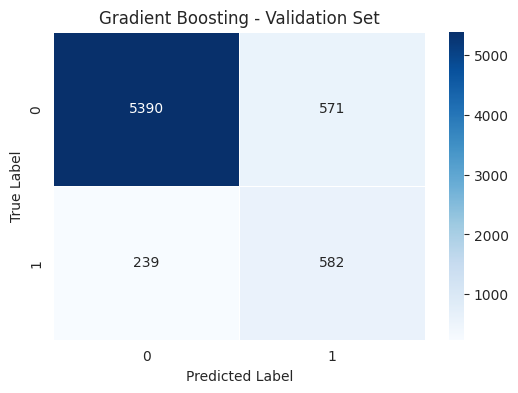

Accuracy on Training Set: 0.9187
Accuracy on Validation Set: 0.8806


In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)
y_train_pred_gb = gb_model.predict(X_train_smote)
y_val_pred_gb = gb_model.predict(X_val_scaled)
accuracy_train_gb = accuracy_score(y_train_smote, y_train_pred_gb)
classification_report_train_gb = classification_report(y_train_smote, y_train_pred_gb)
print("Classification Report on Training Set:\n", classification_report_train_gb)
accuracy_val_gb = accuracy_score(y_val, y_val_pred_gb)
classification_report_val_gb = classification_report(y_val, y_val_pred_gb)
print("Classification Report on Validation Set:\n", classification_report_val_gb)
cm_train_gb = confusion_matrix(y_train_smote, y_train_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_gb, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Gradient Boosting - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
cm_val_gb = confusion_matrix(y_val, y_val_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_gb, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Gradient Boosting - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print accuracy
print(f"Accuracy on Training Set: {accuracy_train_gb:.4f}")
print(f"Accuracy on Validation Set: {accuracy_val_gb:.4f}")


## Testing


Classification Report for Gradient Boosting on Testing Set:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      6005
           1       0.49      0.72      0.58       777

    accuracy                           0.88      6782
   macro avg       0.72      0.81      0.75      6782
weighted avg       0.91      0.88      0.89      6782



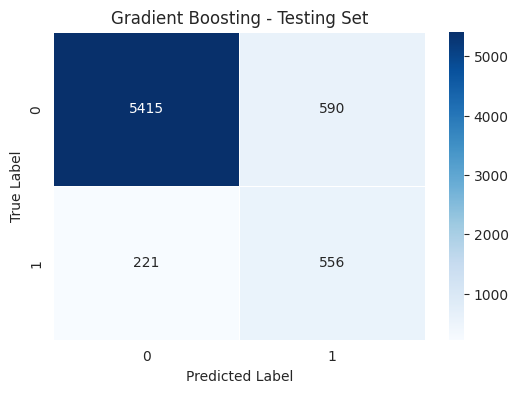

Accuracy on Testing Set for Gradient Boosting: 0.8804


In [ ]:
evaluate_and_plot(gb_model, X_test_scaled, y_test, 'Gradient Boosting')

# Random Forest (Original)

## Training and Validation Set

In [ ]:
rf_model = RandomForestClassifier(random_state=42, class_weight={0: 0.9, 1: 0.1})
rf_model.fit(X_train_smote, y_train_smote)
y_train_pred_rf = rf_model.predict(X_train_smote)
y_val_pred_rf = rf_model.predict(X_val_scaled)

accuracy_train_rf = accuracy_score(y_train_smote, y_train_pred_rf)
classification_report_train_rf = classification_report(y_train_smote, y_train_pred_rf)
print("Classification Report on Training Set:\n", classification_report_train_rf)

accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
classification_report_val_rf = classification_report(y_val, y_val_pred_rf)
print("Classification Report on Validation Set:\n", classification_report_val_rf)

print(f"Accuracy on Training Set: {accuracy_train_rf:.4f}")
print(f"Accuracy on Validation Set: {accuracy_val_rf:.4f}")


<ipython-input-106-526dac1e6c08>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_smote, y_train_smote)


Classification Report on Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27956
           1       1.00      1.00      1.00     27956

    accuracy                           1.00     55912
   macro avg       1.00      1.00      1.00     55912
weighted avg       1.00      1.00      1.00     55912

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      5961
           1       0.54      0.65      0.59       821

    accuracy                           0.89      6782
   macro avg       0.74      0.79      0.76      6782
weighted avg       0.90      0.89      0.89      6782

Accuracy on Training Set: 1.0000
Accuracy on Validation Set: 0.8904


## Testing


Classification Report for Random Forest on Testing Set:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6005
           1       0.54      0.66      0.59       777

    accuracy                           0.90      6782
   macro avg       0.75      0.79      0.77      6782
weighted avg       0.91      0.90      0.90      6782



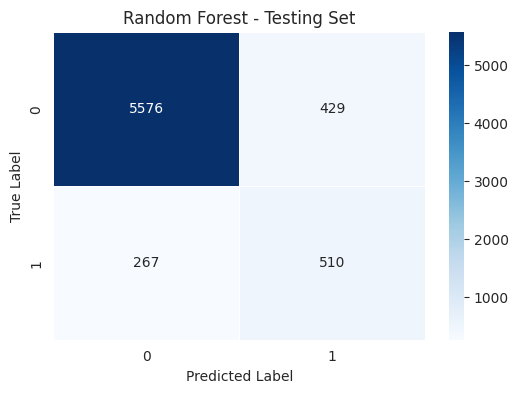

Accuracy on Testing Set for Random Forest: 0.8974


In [ ]:
evaluate_and_plot(rf_model, X_test_scaled, y_test, 'Random Forest')

# Random Forest (Hyperparameter Tuned)

## Training Set


In [ ]:
rf_model_tuned = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_train_pred_rf_tuned = grid_search.predict(X_train_smote)

accuracy_train_rf_tuned = accuracy_score(y_train_smote, y_train_pred_rf_tuned)
classification_report_train_rf_tuned = classification_report(y_train_smote, y_train_pred_rf_tuned)

print(f"Accuracy on Training Set (Tuned): {accuracy_train_rf_tuned:.4f}")
print("Classification Report on Training Set (Tuned):\n", classification_report_train_rf_tuned)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy on Training Set (Tuned): 0.9610
Classification Report on Training Set (Tuned):
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     27956
           1       0.95      0.98      0.96     27956

    accuracy                           0.96     55912
   macro avg       0.96      0.96      0.96     55912
weighted avg       0.96      0.96      0.96     55912



## Validation Set

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_model_tuned = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_smote, y_train_smote)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_val_pred_rf_tuned = grid_search.predict(X_val_scaled)

accuracy_val_rf_tuned = accuracy_score(y_val, y_val_pred_rf_tuned)
classification_report_val_rf_tuned = classification_report(y_val, y_val_pred_rf_tuned)

print(f"Accuracy on Validation Set (Tuned): {accuracy_val_rf_tuned:.4f}")
print("Classification Report on Validation Set (Tuned):\n", classification_report_val_rf_tuned)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Validation Set (Tuned): 0.8927
Classification Report on Validation Set (Tuned):
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      5961
           1       0.55      0.60      0.58       821

    accuracy                           0.89      6782
   macro avg       0.75      0.77      0.76      6782
weighted avg       0.90      0.89      0.89      6782



## Testing


Classification Report for Random Forest (Tuned) on Testing Set:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      6005
           1       0.55      0.59      0.57       777

    accuracy                           0.90      6782
   macro avg       0.75      0.76      0.76      6782
weighted avg       0.90      0.90      0.90      6782



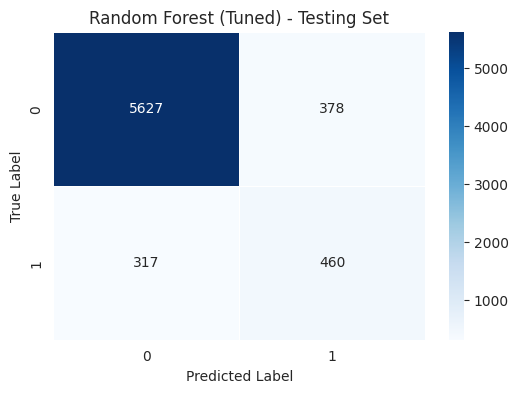

Accuracy on Testing Set for Random Forest (Tuned): 0.8975


In [ ]:
evaluate_and_plot(grid_search, X_test_scaled, y_test, 'Random Forest (Tuned)')

# Model Comparison

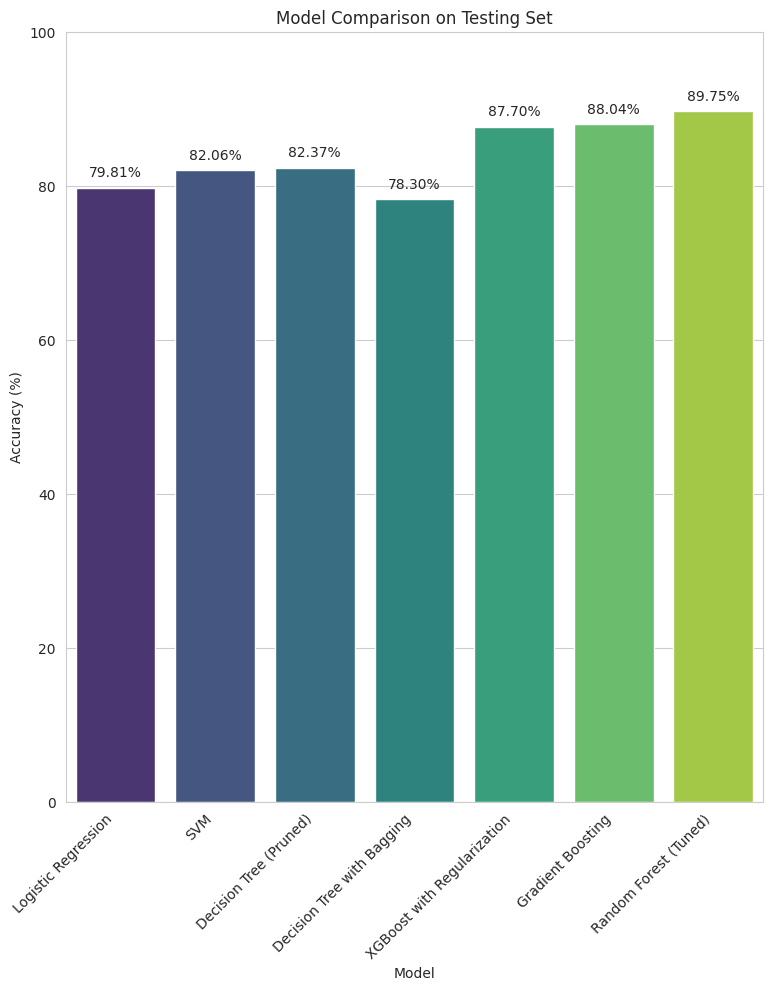

In [ ]:
models = [
    ('Logistic Regression', logreg_model),
    ('SVM', svm_model),
    ('Decision Tree (Pruned)', dtree_model_regularized),
    ('Decision Tree with Bagging', bagging_model),
    ('XGBoost with Regularization', xgb_model),
    ('Gradient Boosting', gb_model),
    ('Random Forest (Tuned)', grid_search)
]

model_accuracies = []
model_names = []

for name, model in models:
    y_test_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    model_accuracies.append(accuracy)
    model_names.append(name)

model_percentages = [acc * 100 for acc in model_accuracies]

plt.figure(figsize=(9, 10))
ax = sns.barplot(x=model_names, y=model_percentages, palette='viridis')
for i, percentage in enumerate(model_percentages):
    ax.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Model Comparison on Testing Set')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.show()


# Features Information

- "job":
       -1: "unknown", 1: "blue-collar", 2: "management", 3: "technician",
        4: "admin.", 5: "services", 6: "retired", 7: "self-employed",
        8: "entrepreneur", 9: "unemployed", 10: "housemaid", 11: "student",
- "marital":
        1: "single", 2: "married", 3: "divorced",
- "education":
      -1: "unknown", 1: "primary", 2: "secondary", 3: "tertiary"
- "default":
       0: "no", 1: "yes"
- "housing":
      0: "no", 1: "yes"
- "loan":
      0: "no", 1: "yes"    
      
- "contact":
      -1: "unknown", 1: "cellular", 2: "telephone"

- "month":
        1: "jan", 2: "feb", 3: "mar", 4: "apr", 5: "may", 6: "jun",
        7: "jul", 8: "aug", 9: "sep", 10: "oct", 11: "nov", 12: "dec"
    
- "poutcome":
      -1: "unknown", 0: "failure", 1: "success", 2: "other"
    
- "subscription":
        0: "no", 1: "yes"

# Predicting using the trained model

In [ ]:

new_data = pd.DataFrame({
    'age': [58],
    'job': [2],
    'marital': [2],
    'education': [3],
    'default': [0],
    'balance': [2143],
    'housing': [1],
    'loan': [0],
    'day': [5],
    'month': [5],
    'duration': [261],
    'campaign': [1],
    'pdays': [-1],
    'previous': [0],
    'poutcome': [2]
})
prediction = grid_search.predict(new_data)

subscription_mapping = {
    0: "Client has not subscribed to term deposit",
    1: "Client has subscribed to term deposit"
}

prediction = grid_search.predict(new_data)

print("Input Features:")
print(new_data)

print("\nOutput:", subscription_mapping[prediction[0]],"\n")



Input Features:
   age  job  marital  education  default  balance  housing  loan  day  month  \
0   58    2        2          3        0     2143        1     0    5      5   

   duration  campaign  pdays  previous  poutcome  
0       261         1     -1         0         2  

Output: Client has not subscribed to term deposit 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
